In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

import pyautogui

In [3]:
class Conv(tf.keras.Model):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        ## 코드 시작 ##
        self.conv = tf.keras.layers.Conv2D(filters=num_filters,kernel_size=[kernel_size, kernel_size],padding='Same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        self.dropout = tf.keras.layers.Dropout(0.25)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv(inputs)    # self.conv forward
        x = self.bn(x)    # self.bn   forward
        x = self.relu(x)    # self.relu forward
        x = self.pool(x)    # self.pool forward
        x = self.dropout(x)
        ## 코드 종료 ##

        return x

In [4]:
class SimpleCNN(tf.keras.Model):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ## 코드 시작 ##
        self.conv1 = Conv(32,5)
        self.conv2 = Conv(64,3)

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=256,activation=tf.nn.relu)
        self.dropout = tf.keras.layers.Dropout(0.25)
        self.dense2 = tf.keras.layers.Dense(units=num_classes,activation=tf.nn.softmax)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv1(inputs)    # self.conv1 forward
        x = self.conv2(x)    # self.conv2 forward
        x = self.flatten(x)    # flatten 
        x = self.dense1(x)    # self.dense1 forward
        x = self.dropout(x)
        x = self.dense2(x)    # self.dense2 forward
        ## 코드 종료 ##

        return x

In [5]:
num_classes=9

model = SimpleCNN()
model.load_weights(tf.train.latest_checkpoint('./trained_model'))

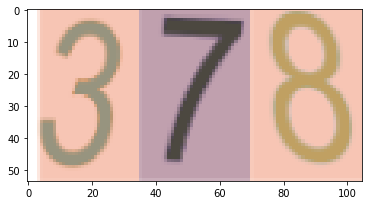

In [35]:
im = pyautogui.screenshot(region=(1000,278, 105, 54))
plt.imshow(im)

In [36]:
print(np.array(im).shape)

(54, 105, 3)


In [37]:
all_number = np.array(im)

first_number = all_number[:,0:31]
second_number = all_number[:,37:68]
third_number = all_number[:,71:102]

In [38]:
print(first_number.shape)
print(second_number.shape)
print(third_number.shape)

(54, 31, 3)
(54, 31, 3)
(54, 31, 3)


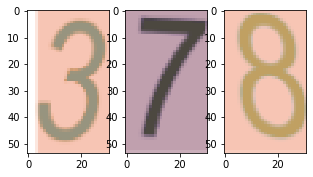

In [39]:
fig = plt.figure(figsize=(5, 5))
p = fig.add_subplot(1, 3, 1)
p.imshow(first_number/255.)
p = fig.add_subplot(1, 3, 2)
p.imshow(second_number/255.)
p = fig.add_subplot(1, 3, 3)
p.imshow(third_number/255.)

In [41]:
import imageio

imageio.imwrite('3.jpg', first_number)
imageio.imwrite('7.jpg', second_number)
imageio.imwrite('8.jpg', third_number)

In [26]:
print(first_number.shape)

(54, 31, 3)


In [27]:
first_number_extension = np.expand_dims(first_number,axis=0)
second_number_extension = np.expand_dims(second_number,axis=0)
third_number_extension = np.expand_dims(third_number,axis=0)

In [28]:
number_array = np.concatenate((first_number_extension,second_number_extension),axis=0)
number_array = np.concatenate((number_array,third_number_extension),axis=0)

In [29]:
number_array.shape

(3, 54, 31, 3)

In [30]:
result = model(number_array[0:2])

ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 6656 but received input with shape [2, 5824]

In [ ]:
labels_map = {1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"}

predict = model(image_array[0:-1], training=False)
real_label = [i for i in range(1,10)]

fig = plt.figure(figsize=(5, 5))
for i, (pre, label, image) in enumerate(zip(predict, real_label, image_array)):
    p = fig.add_subplot(2, 5, i+1)
    if np.argmax(pre)+1 == label:
        p.set_title("{}".format(labels_map[label]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(pre)+1],
                                   labels_map[label]), color='red')
    p.imshow(image/255)
    p.axis('off')